# kernel method (1)------核方法

## 一、什么是 kernel method

kernel method是很多机器学习算法的基础，它的得名是由于这类方法使用了kernel function。我们最初研究的分类算法大多数是线性可分的，利用线性分类算法诸如logistic regression即可完成分类任务。但是还有很多分类问题，不同类别的特征向量不是线性可分的，kernel method 的作用就是将原始空间中的特征向量映射到另外一个空间中(被称为特征空间)，被映射后的向量在这个空间中是线性可分的，这样我们就能够使用线性函数来更容易决定类别之间的决策边界。简单来说，**`kernel method 的作用是将非线性决策边界转化为线性决策边界.`**


## 二、特征映射(feature mapping)

>feature mapping 的作用是将原空间的特征向量映射到特征空间中

feature mapping 通常用函数$\phi$来表示。如下图<img src='a.png'>所示的特征映射中，我们在二维空间中有属于两个类别的数据点，属于类别1的点用红色的圆表示，属于类别2的点用绿色的叉表示。很明显，这两个类别的决策边界近似一个椭圆，假设其方程为$$\frac{x^2}{a^2}+\frac{y^2}{b^2}=1$$

对于这样一个非线性的决策边界，我们是不易进行处理的。我们必须考虑如何将这个非线性的决策边界转化为一个线性的决策边界。尝试引入一个非线性特征映射

$\phi(X)=\phi([x_1,x_2]^T)=Z=[z_1,z_2,z_3]^T=[x_1^2,\sqrt{2}x_1x_2,x_2^2]$

注意，原空间的基为$x_1$,$x_2$,新空间的基为$z_1$,$z_2$,$z_3$.原空间为二维空间，特征空间为3维空间。

此时利用这个特征映射，将原空间的决策边界进行映射之后有：

$$\frac{x_1^2}{a^2}+\frac{x_2^2}{b^2}=1 \rightarrow \frac{1}{a^2}z_1+0*z_2+\frac{1}{b^2}z^3=1$$
决策边界变为三维空间中Z1Z3平面中一条直线，而原空间中的属于不同类别的点还是分在决策边界的两边。




## 三、 kernel function

> kernel function 的记法为 $k(x_1,x_2)$,表示原空间中$x_1$,$x_2$这两个点经过feature mapping之后在特征空间中对应的点的内积。

>即 $k(x_1,x_2)=\phi^T(x_1)\phi(x_2)$

对于上面我们提到的那个feature mapping 函数来说，如下图所示，其对应的kernel function 为 $k(x_1,x_2)=(x_1^Tx_2)^2$

<img src='image1.png' alt='feature mapping与kernel function的对应关系'>

> ### kernel trick

>>* Kernel 技巧的方式如下：

>>   * 把数据映射到一个特征空间(feature space)中（通常有更高的维度）

>>   * 在特征空间中寻找如 线性边界 的(线性)关系

>>* 如果feature mapping的函数选择得当，复杂的(非线性)关系可以被映射称为简单的(线性)关系，这样新的决策边界就很容易被处理了

### 为什么kernel function如此重要

> kernel function 表示的是特征空间中的内积，在欧氏空间中，其他任何特性都由空间的内积可以得到。详见《矩阵论》

1. 利用内积来计算特征空间中距离
<img src='image2.png'>
2. 利用内积来计算特征空间中向量的夹角
<img src='image3.png'>

## 四、feature mapping与kernel function的比较

> Mercer's theorem

>kernel function 与feature mapping函数是一一对应的。$$k(x_1,x_2)=<\phi(x_1),\phi(x_2)>$$

也就是说我们在实际工程中，只要知道feature mapping与kernel function之一即可。
> 但是一般只使用kernel function即可，因为相比较于使用feature mapping计算量要小得多

<img src='image4.png'>

## 五、Inner Product Matrix/ Gram Matrix / Kernel Matrix
<img src='image5.png'>


## 六、什么样的kernel function才是有用的？

1. kernel matrix 必须是有限正半定函数(Finitely positive semi-definite)
$$
k=\begin{vmatrix}
k(x_1,x_1)&\cdots&k(x_1,x_n) \\
\cdots& \ddots&\cdots \\
K(x_n,x_1)&\cdots&k(x_n,x_n)
\end{vmatrix}\geq 0
$$
2. kernel function 是对称的

  $$k(x_1,x_2)=k(x_2,x_1)$$
3.kernel function的另外一种表示
<img src='image6.png'>

不过在很多机器学习的文献中，X用$\Phi$表示，即$K=\Phi \Phi^T$，也就是说，$\Phi$的第n行是$\phi(X_n)^T$
$$\Phi=\begin{bmatrix}\\
\phi (X_1)^T \\
\vdots \\
\phi (X_n)^T
\end{bmatrix}
$$

## 七、Dual Representations

> 很多用于回归和分类的线性算法都有双重表示，可以很自然地用kernel函数来表示,这在支持向量机中起到了很重要的作用

现在我们考虑一个简单的线性回归模型，它的参数由最小化一个正则化的误差平方和来得到。

$$J(W)=\frac{1}{2}\sum_{n=1}^N \{ W^T\phi(X_n)-t_n \}^2+\frac{\lambda}{2}W^TW$$
其中正则化参数$\lambda\geq0$。我们令误差平方和函数对W的导数为0可以得到：
$$\sum_{n=1}^N \{ W^T\phi(X_n)-t_n \}\phi(X_n)+\lambda W=0\\
\Rightarrow W=-\frac{1}{\lambda}\sum_{n=1}^N \{ W^T\phi(X_n)-t_n \}\phi(X_n)\\
=\sum_{n=1}^Na_n\phi(X_n)=\Phi^T\mathbf{a}$$ 

其中$\Phi$的第n行是$\phi(X_n)$，

向量$\mathbf{a}=(a_1,....a_n)^T$,并且定义
$$a_n=-\frac{1}{\lambda}\sum_{n=1}^N \{ W^T\phi(X_n)-t_n \}$$
将$W=\Phi^T\mathbf{a}$代入$J(W)$可以得到如下的式子，使用$\mathbf{a}$来表示误差平方和函数就是所谓的dual representation

$$J(\mathbf{a})=\frac{1}{2}\mathbf{a}^T \Phi \Phi ^T \Phi \Phi ^T \mathbf{a}-\mathbf{a}^T\Phi \Phi ^T \mathbf{t}+\frac{1}{2}\mathbf{t}^T\mathbf{t}+\frac{\lambda}{2}\mathbf{a}^T \Phi \Phi ^T \mathbf{a}$$

其中 $\mathbf{t}=(t_1,...,t_n)^T$,又因为$K=\Phi \Phi ^T$

$$J(\mathbf{a})=\frac{1}{2}\mathbf{a}^T \mathbf{K}\mathbf{K} \mathbf{a}-\mathbf{a}^T \mathbf{K} \mathbf{t}+\frac{1}{2}\mathbf{t}^T\mathbf{t}+\frac{\lambda}{2}\mathbf{a}^T \mathbf{K} \mathbf{a}$$

令$J(\mathbf{a})$对$\mathbf{a}$的导数为0，我们可以得到：

$$\mathbf{a}=(\mathbf{K}+\lambda \mathbf{I}_N)^{-1}\mathbf{t}$$
将其代入到线性回归模型中,那么对于新的输入x有
$$y(x)=W^T\phi(x)=\mathbf{a}^T \Phi \phi (x)=\mathbf{t}^T(\mathbf{K}+\lambda \mathbf{I}_N)^{-1} \mathbf{K}(X)\\
\Rightarrow y(x)=\mathbf{K}(X)^T(\mathbf{K}+\lambda \mathbf{I}_N)^{-1}\mathbf{t}
$$
其中$\mathbf{K}(X)=\Phi \phi (x)$的元素为$k_n(X)=k(X_n,x)$。这是因为
$$\Phi=\begin{bmatrix}\\
\phi (X_1)^T \\
\vdots \\
\phi (X_n)^T
\end{bmatrix}
$$

因此线性回归模型完全可以用kernel function来表示
$$y(x)=\mathbf{K}(X)^T(\mathbf{K}+\lambda \mathbf{I}_N)^{-1}\mathbf{t}$$

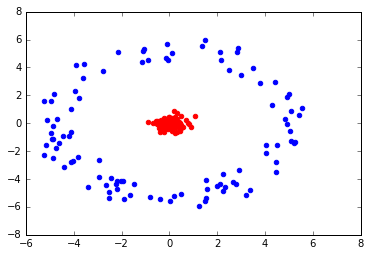

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

data=np.loadtxt('nonlinear_data.txt') #数据的第一列表示x1，第二列表示x2,第三列表示对应的类别{1,2}
X=data[:,0:2]


#用0和1表示类别
t=data[:,2]-1



index=data[:,2]==2
plt.scatter(data[index,0],data[index,1],color='b')
index=data[:,2]==1
plt.scatter(data[index,0],data[index,1],color='r')

In [2]:
def kernel(x1,x2):
    return np.square(np.dot(x1.T,x2))

#构建kernel matrix
K=np.zeros((len(X),len(X)))
for i in xrange(len(X)):
    for j in xrange(len(X)):
        K[i,j]=kernel(X[i],X[j])
        

x=np.array([0,-1]) # 新的输入x


k=np.zeros((len(X),1))
for i in xrange(len(X)):
    k[i]=kernel(x,X[i])
    
temp=np.dot(k.T,np.linalg.inv(K+0.5*np.identity(len(X))))
y_x=np.dot(temp,t)
print y_x

[ 0.03453649]
